<a href="https://colab.research.google.com/github/ealexbarros/Machine-Learning-Projects/blob/master/Random_Forests_Baseado_no_trabalho_original_com_o_driverdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Apresentando os dados

In [0]:
# Data from Google Drive
data_url = "https://raw.githubusercontent.com/ealexbarros/Machine-Learning-Projects/master/Ensemble%20Learning/ecg_id.csv""
data_df = pd.read_csv(data_url)

In [0]:
data_df.head(3)

,Person,meanQ,meanR,meanS,desvioQ,desvioR,desvioS,durationR,timeRR,rqAmp
0,driver1,0.207773,0.228318,0.088273,0.032053,0.027748,0.391209,0.023591,0.050524,0.020545
1,driver1,0.150375,0.213875,-0.223875,0.045713,0.028799,0.689400,0.022125,0.203714,0.063500
2,driver1,0.225000,0.414000,-1.234000,0.000000,0.000000,0.000000,0.054000,NaN,0.189000


In [0]:
data_df.describe()

,meanQ,meanR,meanS,desvioQ,desvioR,desvioS,durationR,timeRR,rqAmp
count,14831.000000,14831.000000,14831.000000,14831.000000,14831.000000,14831.000000,14831.000000,14720.000000,14831.000000
mean,-0.131417,1.085273,-0.315129,0.038554,0.033743,0.073026,0.057575,0.794335,1.216690
std,0.175509,0.471797,0.284678,0.097376,0.031335,0.159251,0.015808,0.226390,0.523722
min,-2.796750,-2.605500,-9.246000,0.000000,0.000000,0.000000,0.008000,0.006000,-0.039000
25%,-0.203600,0.885250,-0.392667,0.010134,0.014142,0.016822,0.053000,0.690188,1.032100
50%,-0.154667,1.027333,-0.332000,0.018348,0.023700,0.030286,0.054750,0.828667,1.187000
75%,-0.107750,1.179000,-0.153000,0.036020,0.042350,0.051415,0.058333,0.927000,1.306000
max,7.876000,9.839000,5.953700,7.709582,0.588118,7.815797,0.146000,2.659000,5.880100


## Preparando os dados

In [0]:
# Armazenando os nomes das colunas originais
original_columns = data_df.columns[1:]
# Os rótulos originais dos dados
original_labels = data_df['Person'].unique()
# Codifica os rótulos em valores numéricos
le = LabelEncoder()
data_df['Person'] = le.fit_transform(data_df['Person'])

In [0]:
# Remove os rótulos
X = data_df.drop('Person', axis=1)
# Preenche os dados faltosos com a média da respectiva coluna
X = X.apply(lambda x: x.fillna(x.mean()))
# O objeto da predição é 'y' (os rótulos das classes)
y = data_df['Person']

## Análise dos componentes principais
### (Somente para propósitos ilustrativos)

In [0]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [0]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
reduced_data = pca.transform(X)

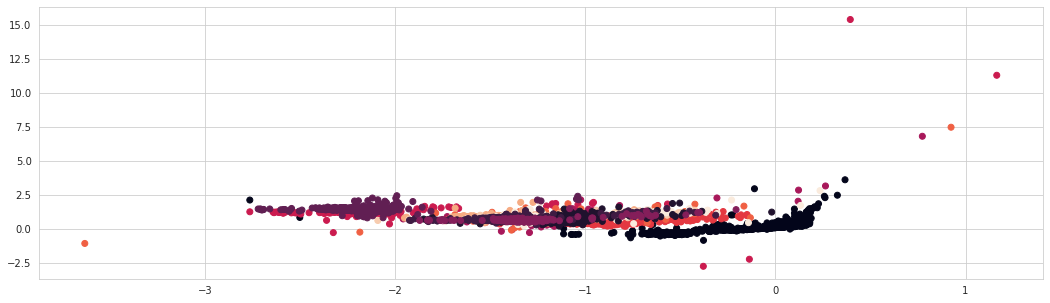

In [0]:
plt.figure(figsize=(18,5))
plt.scatter(reduced_data[:,0], reduced_data[0:,1], c=y)

## Treinando o modelo com os dados originais
### (Pode ser usado para comparar as melhoras obtidas posteriormente)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test)

## Verificando resultados obtidos com os dados originais

In [0]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       223
           1       0.98      0.98      0.98       227
           2       0.62      0.59      0.60       217
           3       1.00      1.00      1.00       219
           4       0.88      0.85      0.86       249
           5       0.90      0.88      0.89       217
           6       1.00      1.00      1.00       227
           7       1.00      1.00      1.00       235
           8       0.69      0.77      0.72       213
           9       0.82      0.86      0.84       220
          10       0.94      0.98      0.96       255
          11       0.76      0.72      0.74       239
          12       0.66      0.61      0.63       226

    accuracy                           0.87      2967
   macro avg       0.86      0.86      0.86      2967
weighted avg       0.86      0.87      0.86      2967



In [0]:
print(confusion_matrix(y_test, predictions))

[[222   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0 223   0   0   0   3   0   1   0   0   0   0   0]
 [  0   0 128   0   3   0   0   0  21   5   1  22  37]
 [  0   0   0 219   0   0   0   0   0   0   0   0   0]
 [  0   0   3   0 211   1   0   0   6  10   0   0  18]
 [  1   4   1   0   0 192   0   0   0  18   0   0   1]
 [  0   0   0   0   0   0 227   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 235   0   0   0   0   0]
 [  0   1   8   0   3   1   0   0 163   3   6  20   8]
 [  0   0   2   0   5  16   0   0   2 190   2   0   3]
 [  0   0   3   0   0   0   0   0   1   0 250   1   0]
 [  0   0  29   0   0   0   0   0  29   0   5 171   5]
 [  2   0  33   0  19   1   0   0  15   5   1  12 138]]


## Quantificando a importância de cada característica original
### (Somente para proprósitos ilustrativos)

In [0]:
importances = [(feature, round(importance, 2)) for feature, importance in zip(original_columns, rf.feature_importances_)]
sorted_importances = sorted(importances, key=lambda x:x[1], reverse=True) 

for pair in sorted_importances:
    print('Feature: {:20} Importance: {}'.format(*pair))

Feature: rqAmp                Importance: 0.24
Feature: meanR                Importance: 0.22
Feature: meanS                Importance: 0.15
Feature: durationR            Importance: 0.11
Feature: timeRR               Importance: 0.1
Feature: meanQ                Importance: 0.07
Feature: desvioQ              Importance: 0.04
Feature: desvioR              Importance: 0.04
Feature: desvioS              Importance: 0.04


<BarContainer object of 9 artists>

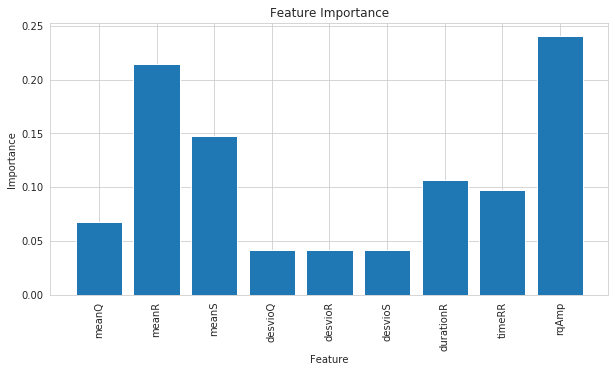

In [0]:
x_values = range(len(rf.feature_importances_))
plt.figure(figsize=(10,5))
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importance')
plt.xticks(x_values, original_columns, rotation='vertical')
plt.bar(x_values, rf.feature_importances_, orientation = 'vertical')

## Treinando os modelos com os dados reduzidos em dimensionalidade
### (Somente para proprósitos demonstrativos, já que esta técnica não demonstrou ser melhor do que a original)

In [0]:
X_train_scaled_data, X_test_scaled_data, y_train_scaled_data, y_test_scaled_data = train_test_split(scaled_data, y, test_size = 0.2)

In [0]:
second_rf = RandomForestClassifier(n_estimators=1000)
second_rf.fit(X_train_scaled_data, y_train_scaled_data)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
new_predictions = second_rf.predict(X_test_scaled_data)

## Verificando resultados obtidos com o modelo treinado com dados reduzidos

In [0]:
print(classification_report(y_test_scaled_data, new_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       228
           1       0.98      0.98      0.98       217
           2       0.60      0.58      0.59       246
           3       1.00      1.00      1.00       219
           4       0.85      0.77      0.81       249
           5       0.89      0.88      0.88       235
           6       0.98      1.00      0.99       214
           7       1.00      0.99      0.99       237
           8       0.73      0.70      0.72       210
           9       0.78      0.85      0.81       220
          10       0.96      1.00      0.98       235
          11       0.71      0.72      0.71       225
          12       0.59      0.62      0.60       232

    accuracy                           0.85      2967
   macro avg       0.85      0.85      0.85      2967
weighted avg       0.85      0.85      0.85      2967



In [0]:
print(confusion_matrix(y_test_scaled_data, new_predictions))

[[226   0   0   0   0   0   2   0   0   0   0   0   0]
 [  0 213   0   0   0   3   0   1   0   0   0   0   0]
 [  0   0 143   0   3   1   0   0  21   7   1  29  41]
 [  0   0   0 218   0   0   1   0   0   0   0   0   0]
 [  0   0   9   0 191   3   0   0   3  16   0   0  27]
 [  0   3   1   0   2 207   0   0   1  17   0   0   4]
 [  0   0   0   1   0   0 213   0   0   0   0   0   0]
 [  0   1   1   0   0   0   0 235   0   0   0   0   0]
 [  1   0   7   0   4   0   1   0 147   6   4  30  10]
 [  0   0   0   0   7  18   0   0   3 186   0   1   5]
 [  0   0   0   0   0   0   0   0   1   0 234   0   0]
 [  0   0  32   0   0   0   0   0  16   0   4 162  11]
 [  3   0  45   0  18   1   1   0   8   5   1   7 143]]


# Retreinando o modelo com uma busca em grid para obtenção dos melhores parâmetros
### (Somente para proprósitos demonstrativos, já que esta técnica não demonstrou ser melhor do que a original)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }

In [0]:
new_rf = RandomForestClassifier(n_jobs=-1)
grid_search = GridSearchCV(estimator =new_rf, param_grid=param_grid, cv=3, verbose=2)

In [0]:
# Faz uma busca em grid para a obtenção dos melhores parâmetros
#grid_search.fit(X_train, y_train)

In [0]:
# Os melhores parâmetros encontrados foram:
#grid_search.best_params_
best_parameters = {'max_depth': 100,
                   'min_samples_leaf': 3,
                   'min_samples_split': 10,
                   'n_estimators': 200}

## Retreinando o modelo com os novos (melhores) parametros

In [0]:
third_rf = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=3, min_samples_split=10)
third_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
third_predictions = rf.predict(X_test)

## Novos resultados da classificação

In [0]:
print(classification_report(y_test, third_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       223
           1       0.98      0.98      0.98       227
           2       0.62      0.59      0.60       217
           3       1.00      1.00      1.00       219
           4       0.88      0.85      0.86       249
           5       0.90      0.88      0.89       217
           6       1.00      1.00      1.00       227
           7       1.00      1.00      1.00       235
           8       0.69      0.77      0.72       213
           9       0.82      0.86      0.84       220
          10       0.94      0.98      0.96       255
          11       0.76      0.72      0.74       239
          12       0.66      0.61      0.63       226

    accuracy                           0.87      2967
   macro avg       0.86      0.86      0.86      2967
weighted avg       0.86      0.87      0.86      2967



In [0]:
print(confusion_matrix(y_test, third_predictions))

[[222   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0 223   0   0   0   3   0   1   0   0   0   0   0]
 [  0   0 128   0   3   0   0   0  21   5   1  22  37]
 [  0   0   0 219   0   0   0   0   0   0   0   0   0]
 [  0   0   3   0 211   1   0   0   6  10   0   0  18]
 [  1   4   1   0   0 192   0   0   0  18   0   0   1]
 [  0   0   0   0   0   0 227   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 235   0   0   0   0   0]
 [  0   1   8   0   3   1   0   0 163   3   6  20   8]
 [  0   0   2   0   5  16   0   0   2 190   2   0   3]
 [  0   0   3   0   0   0   0   0   1   0 250   1   0]
 [  0   0  29   0   0   0   0   0  29   0   5 171   5]
 [  2   0  33   0  19   1   0   0  15   5   1  12 138]]


## Tentando diminuir a influência de 'pontos fora da curva' removendo eles
### Relevante! Esta proposta melhorou os resultados do modelo

Text(0.5, 1.0, 'Dados com alguns outliers')

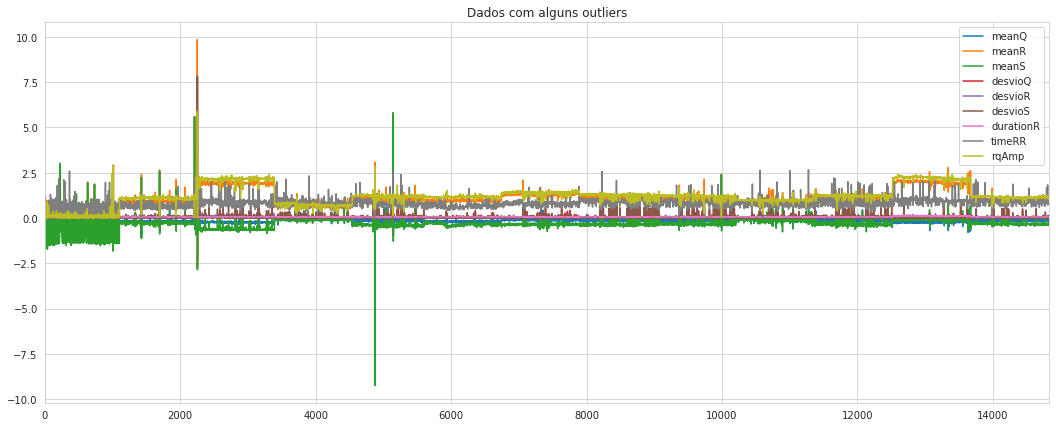

In [0]:
X.plot(figsize=(18,7))
plt.title("Dados com alguns outliers")

Text(0.5, 1.0, "'Pontos fora da curva' saltando para fora das caixas")

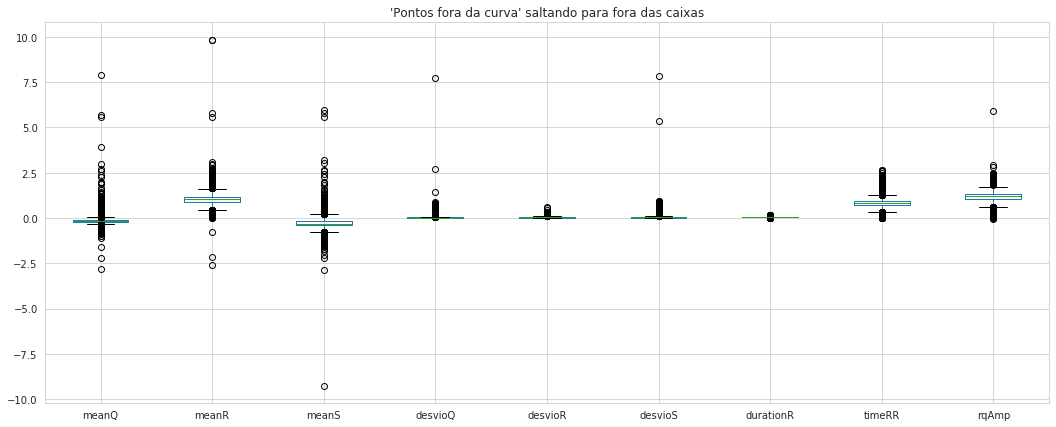

In [0]:
X.plot(kind='box', figsize=(18,7))
plt.title("'Pontos fora da curva' saltando para fora das caixas")

In [0]:
z_score = np.abs(stats.zscore(X))
threshold = 3 # Obeservações que variaram 3 vezes mais que o desvio padrão serão eliminadas

In [0]:
no_outliers_X = X[(z_score < threshold).all(axis=1)]

Text(0.5, 1.0, "Dados após a remoção dos 'pontos fora da curva'")

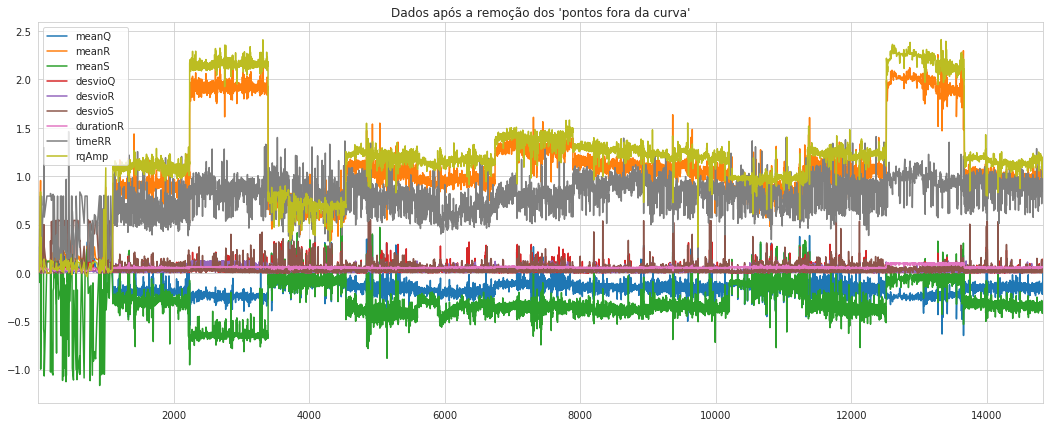

In [0]:
no_outliers_X.plot(figsize=(18,7))
plt.title("Dados após a remoção dos 'pontos fora da curva'")

## Terceiro treinamento de modelo, agora sem outliers
### Relevante, obtivemos os melhores resultados com esta técnica

In [0]:
# Junta os dados filtrados com os dados originais
filtered_data_df = pd.concat([data_df.loc[:,'Person'], no_outliers_X], axis=1)
# Limpa nulos correspondentes as linhas que continham observações que eram outliers
filtered_data_df.dropna(axis=0, inplace=True)
# Re substitui os rótulos como valores numéricos
filtered_data_df['Person'] = le.fit_transform(filtered_data_df['Person'])

In [0]:
X = filtered_data_df.drop('Person', axis=1)
y = filtered_data_df['Person']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
# O classificador é instanciado com os melhores parâmetros (obtidos pela busca em grid)
fourth_rf = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=3, min_samples_split=10)
fourth_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
fourth_predictions = rf.predict(X_test)

In [0]:
print(classification_report(y_test, fourth_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.99      1.00      0.99       228
           2       0.94      0.92      0.93       197
           3       1.00      1.00      1.00       126
           4       0.98      0.98      0.98       243
           5       0.98      0.99      0.98       208
           6       1.00      1.00      1.00       195
           7       1.00      1.00      1.00       224
           8       0.93      0.95      0.94       198
           9       0.98      0.98      0.98       236
          10       0.98      1.00      0.99       231
          11       0.95      0.94      0.95       218
          12       0.95      0.93      0.94       214

    accuracy                           0.97      2543
   macro avg       0.98      0.98      0.98      2543
weighted avg       0.97      0.97      0.97      2543



In [0]:
print(confusion_matrix(y_test, fourth_predictions))

[[ 25   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 227   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   7   2   0   4   3]
 [  0   0   0 126   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0 237   0   0   0   0   1   0   0   4]
 [  0   2   0   0   0 205   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0 195   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 224   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0 189   0   1   5   2]
 [  0   0   1   0   0   4   0   0   0 231   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 231   0   0]
 [  0   0   3   0   0   0   0   0   5   0   2 206   2]
 [  0   0   5   0   4   0   0   0   3   0   1   2 199]]


In [0]:
print(precision_score(y_test, fourth_predictions, average='macro'))

0.975626910500281
